In [23]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Display plots in-notebook
%matplotlib inline

%load_ext autoreload
%autoreload 2

from my_functions import BusStopFile
from my_functions import Passenger_Data
from my_functions import HDB_Data
from my_functions import EDA_Data
from my_functions import Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Getting data

## LTA API Documentation
https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

## Bus Stop Data

In [4]:
# Create a dataframe to store the bus stop data
stop_df = pd.DataFrame(columns=['BusStopCode', 'RoadName', \
                                    'Description', 'Latitude', \
                                    'Longitude'])

# Extract the bus stop data into a dataframe
stop_df = BusStopFile('BusStops',stop_df).get_stop_data(0 , 5500)

The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=0
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=500
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=1000
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=1500
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=2000
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=2500
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=3000
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=3500
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=4000
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=4500
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=5000


In [5]:
print(f'There were {len(stop_df)} bus stops extracted from the LTA API.')
print(stop_df.head())

There were 5083 bus stops extracted from the LTA API.
  BusStopCode       RoadName          Description  Latitude   Longitude
0       01012    Victoria St  Hotel Grand Pacific  1.296848  103.852536
1       01013    Victoria St      St. Joseph's Ch  1.297710  103.853225
2       01019    Victoria St      Bras Basah Cplx  1.296990  103.853022
3       01029  Nth Bridge Rd         Opp Natl Lib  1.296673  103.854414
4       01039  Nth Bridge Rd           Bugis Cube  1.298208  103.855491


In [6]:
# export the dataframe to a csv file
stop_df.to_csv('data/bus_stops.csv', index=False)

## Foot Traffic Data

In [ ]:
# Extract foot traffic data from the LTA API for the past 3 months
traffic_link = BusStopFile('Bus').get_stop_traffic('202211')
time.sleep(10)
traffic_link = BusStopFile('Bus').get_stop_traffic('202212')
time.sleep(10)
traffic_link = BusStopFile('Bus').get_stop_traffic('202301')

In [ ]:
# import all the csvs and concat them
df = pd.read_csv('data/transport_node_bus_202211.csv')
df1 = pd.read_csv('data/transport_node_bus_202212.csv')
df2 = pd.read_csv('data/transport_node_bus_202301.csv')

traffic_df = pd.concat([df,df1,df2], ignore_index=True)

In [ ]:
traffic_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2022-11,WEEKDAY,17,BUS,45379,375,368
1,2022-11,WEEKENDS/HOLIDAY,17,BUS,45379,142,102
2,2022-11,WEEKENDS/HOLIDAY,13,BUS,80051,965,902
3,2022-11,WEEKDAY,13,BUS,80051,2329,2319
4,2022-11,WEEKENDS/HOLIDAY,8,BUS,3511,50,133


In [ ]:
len(traffic_df)

590332

In [ ]:
# convert PT_CODE to string
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].astype(str)

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

In [ ]:
# export traffic_df as csv
traffic_df.to_csv('data/traffic_df.csv', index=False)

## McDonalds Data

In [ ]:
# to be filled
# title, address, latitude, longitude data extracted from octoparse
# price classification extracted from mcdonalds app
# planning area manually eyeballed

In [352]:
mcd_df

,Title,Address,Latitude,Longitude,Classification,Planning Area
0,McDonald's Tampines East CC,"10 Tampines St 23, #01-01 Tampines East Commun...",1.353387,103.954599,Medium,Tampines
1,McDonald's Tampines Mall,"4 Tampines Central 5, #01 - 33 Tampines Mall, ...",1.352739,103.944979,Medium,Tampines
2,McDonald's Tampines West CC,"5 Tampines Ave 3, #01-01 Tampines West Communi...",1.348807,103.935786,Medium,Tampines
3,McDonald's Bedok Reservoir,"632 Bedok Reservoir Rd, #01-850, Singapore 470632",1.332194,103.913711,Low,Bedok
4,McDonald's Pasir Ris Sports Complex,"120 Pasir Ris Central, #01-12 Sports Centre, S...",1.374088,103.951925,High,Pasir Ris
...,...,...,...,...,...,...
132,McDonald's Harbour Front Centre,"01-87, #01-88 and #01-89 1, Maritime Square, H...",1.264217,103.820358,High,Bukit Merah
133,McDonald's Vivocity,"1 HarbourFront Walk, B2-40/41/42 VivoCity, Sin...",1.264799,103.821481,High,Bukit Merah
134,McDonald's Shell Havelock,"548 Havelock Rd, Singapore 169637",1.290026,103.832506,High,Bukit Merah
135,McDonald's Tampines (near CPF Building),"Blk 513 Tampines Central 1, #01-150, Singapore...",1.353609,103.944148,Medium,Tampines


## HDB Data

In [2]:
# import hdb data
hdb_df = pd.read_csv('data/hdb-property-information.csv')

In [3]:
# create address column based on block and street name
hdb_df['address'] = str(hdb_df['blk_no']) + ' ' + hdb_df['street']

In [ ]:
import requests
import json

# with open('one_map_api.txt', 'r') as f:
#     token = f.read().strip()

latitudes = []
longitude = []

for i in range(len(hdb_df)):
    url = f"https://developers.onemap.sg/commonapi/search?searchVal={hdb_df.loc[i,'address']}&returnGeom=Y&getAddrDetails=N&pageNum=1"
    data = requests.get(url).json()
    try:
        latitudes.append(data['results'][0]['LATITUDE'])
        longitude.append(data['results'][0]['LONGITUDE'])
    except:
        latitudes.append(0)
        longitude.append(0)
    time.sleep(0.15)
    print(f'this is run {i}')

In [8]:
print(len(latitudes))
print(len(longitude))

12627
12627


In [15]:
# save latitudes and longitudes into hdb_df as 'latitude' and 'longitude'
hdb_df['latitude'] = latitudes
hdb_df['longitude'] = longitude

In [16]:
# export hdb_df as csv
hdb_df.to_csv('data/hdb_df.csv', index=False)

## Hawker Data

In [4]:
import json

# import geojson file
with open('hawker-centres-geojson.geojson') as f:
    data = json.load(f)

In [34]:
h_latitude=[]
h_longitude=[]

for i in range(len(data['features'])):
    h_latitude.append(data['features'][i]['geometry']['coordinates'][1])
    h_longitude.append(data['features'][i]['geometry']['coordinates'][0])


# create a dataframe to store the hawker centre data
hawker_df = pd.DataFrame(columns=['latitude', 'longitude'])
hawker_df['latitude']=h_latitude
hawker_df['longitude']=h_longitude

In [35]:
# export hawker_df as csv
hawker_df.to_csv('data/hawker_df.csv', index=False)

# 2. Importing Data

In [39]:
# import csvs
traffic_df = pd.read_csv('data/traffic_df.csv')
stop_df = pd.read_csv('data/bus_stops.csv')
mcd_df = pd.read_csv('data/mcdonalds_data.csv')
hdb_df = pd.read_csv('data/hdb_df.csv')

## traffic_df

In [3]:
traffic_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2022-11,WEEKDAY,17,BUS,45379,375,368
1,2022-11,WEEKENDS/HOLIDAY,17,BUS,45379,142,102
2,2022-11,WEEKENDS/HOLIDAY,13,BUS,80051,965,902
3,2022-11,WEEKDAY,13,BUS,80051,2329,2319
4,2022-11,WEEKENDS/HOLIDAY,8,BUS,3511,50,133


In [3]:
# convert PT_CODE to string
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].astype(str)

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

traffic_df.head()

5    563474
4     26858
Name: PT_CODE_LEN, dtype: int64


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2022-11,WEEKDAY,17,BUS,45379,375,368
1,2022-11,WEEKENDS/HOLIDAY,17,BUS,45379,142,102
2,2022-11,WEEKENDS/HOLIDAY,13,BUS,80051,965,902
3,2022-11,WEEKDAY,13,BUS,80051,2329,2319
4,2022-11,WEEKENDS/HOLIDAY,8,BUS,03511,50,133


In [277]:
# create a pivot table of total tap outs (TOTAL_TAP_OUT_VOLUME) at a bus stop (PT_CODE)
traffic_pivot = pd.pivot_table(traffic_df, index='PT_CODE', values='TOTAL_TAP_OUT_VOLUME', aggfunc='sum')

## stop_df

In [87]:
stop_df.head()

,BusStopCode,RoadName,Description,Latitude,Longitude
0,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536
1,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225
2,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022
3,1029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414
4,1039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491


## mcd_df

In [99]:
mcd_df.head()

,Title,Address,Latitude,Longitude,Classification,Planning Area,Region,Region Type,Property Type
0,McDonald's Tampines East CC,"10 Tampines St 23, #01-01 Tampines East Commun...",1.353387,103.954599,Medium,Tampines,East,OCR,State
1,McDonald's Tampines Mall,"4 Tampines Central 5, #01 - 33 Tampines Mall, ...",1.352739,103.944979,Medium,Tampines,East,OCR,Retail
2,McDonald's Tampines West CC,"5 Tampines Ave 3, #01-01 Tampines West Communi...",1.348807,103.935786,Medium,Tampines,East,OCR,State
3,McDonald's Bedok Reservoir,"632 Bedok Reservoir Rd, #01-850, Singapore 470632",1.332194,103.913711,Low,Bedok,East,OCR,NaN
4,McDonald's Pasir Ris Sports Complex,"120 Pasir Ris Central, #01-12 Sports Centre, S...",1.374088,103.951925,High,Pasir Ris,East,OCR,State


In [61]:
# Create another classification column and classify them into lower or higher
mcd_df['AltClass'] = mcd_df['Classification'].apply(lambda x: 'lower' if x == 'Low' else 'higher')

# 3. Feature Engineering

In [6]:
# set a list of distances in km
distance_list = [0.2,0.5,1,2]

In [ ]:
# Get the passenger volume and number of stops within the specified distance
for i in distance_list:
    print(f'This is the run for distance {i}km')
    empty_matrix = Passenger_Data(stop_df, mcd_df)
    
    # get the passenger in, passenger out and number of stops
    passenger_in, passenger_out, num_stops = empty_matrix.traffic_volume(i, mcd_df, stop_df, traffic_df)
    
    # save the data to csv
    passenger_in.to_csv(f'passenger_in{i}.csv', index=False)
    passenger_out.to_csv(f'passenger_out{i}.csv', index=False)
    num_stops.to_csv(f'num_stops{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

In [ ]:
# Get the num_hdb feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    matrix = HDB_Data(mcd_df)
    
    # get the hdb data
    hdb= matrix.num_hdb(i,mcd_df,hdb_df)

    # save the data to csv
    hdb.to_csv(f'hdb_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

In [ ]:
# Get the hawker num feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    matrix = HDB_Data(mcd_df)
    
    # get the hdb data
    hdb= matrix.num_hdb(i,mcd_df,hawker_df)

    # save the data to csv
    hdb.to_csv(f'hawker_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

# 4. EDA

## import feature engineered data

In [40]:
# import csv and concat to mcd_df
passenger_in_02 = pd.read_csv('passenger_in0.2.csv')
passenger_in_05 = pd.read_csv('passenger_in0.5.csv')
passenger_in_1 = pd.read_csv('passenger_in1.csv')
passenger_in_2 = pd.read_csv('passenger_in2.csv')
passenger_out_02 = pd.read_csv('passenger_out0.2.csv')
passenger_out_05 = pd.read_csv('passenger_out0.5.csv')
passenger_out_1 = pd.read_csv('passenger_out1.csv')
passenger_out_2 = pd.read_csv('passenger_out2.csv')
num_stops_02 = pd.read_csv('num_stops0.2.csv')
num_stops_05 = pd.read_csv('num_stops0.5.csv')
num_stops_1 = pd.read_csv('num_stops1.csv')
num_stops_2 = pd.read_csv('num_stops2.csv')
hdb_02 = pd.read_csv('hdb_0.2.csv')
hdb_05 = pd.read_csv('hdb_0.5.csv')
hdb_1 = pd.read_csv('hdb_1.csv')
hdb_2 = pd.read_csv('hdb_2.csv')
hawker_02 = pd.read_csv('hawker_0.2.csv')
hawker_05 = pd.read_csv('hawker_0.5.csv')
hawker_1 = pd.read_csv('hawker_1.csv')
hawker_2 = pd.read_csv('hawker_2.csv')

# concat the dataframes to mcd_df
mcd_df = pd.concat([mcd_df, passenger_in_02, passenger_in_05, passenger_in_1, passenger_in_2, passenger_out_02, passenger_out_05, passenger_out_1, passenger_out_2, \
                    num_stops_02, num_stops_05, num_stops_1, num_stops_2, \
                    hdb_02, hdb_05, hdb_1, hdb_2, \
                    hawker_02, hawker_05, hawker_1, hawker_2]\
                    ,axis=1)

## Cleaning

In [41]:
# drop classification column that include tourist or student branches
mcd_df.drop(mcd_df[mcd_df['Classification'].str.contains('Tourist')].index, inplace=True)
mcd_df.drop(mcd_df[mcd_df['Classification'].str.contains('Student')].index, inplace=True)

# reset the index
mcd_df.reset_index(drop=True, inplace=True)

print(f'There are a total of {len(mcd_df)} McDonalds to be looked at')

There are a total of 137 McDonalds to be looked at


In [ ]:
# # convert Density, Population to float
# # remove , from Density
# mcd_df['Density'] = mcd_df['Density'].apply(lambda x: x.replace(',',''))
# mcd_df['Density'] = mcd_df['Density'].apply(lambda x: float(x))
# # remove , from Population
# mcd_df['Population'] = mcd_df['Population'].apply(lambda x: x.replace(',',''))
# mcd_df['Population'] = mcd_df['Population'].apply(lambda x: float(x))
# mcd_df.info()

In [42]:
# # create a copy of mcd_df
mcd_df_copy = mcd_df.copy()

# mcd_df_copy.drop(mcd_df_copy[mcd_df_copy['Title'].str.contains('Shell')].index, inplace=True)
# mcd_df_copy.drop(mcd_df_copy[mcd_df_copy['Title'].str.contains('SAFRA')].index, inplace=True)

# drop the columns that are not needed
mcd_df_copy.drop(['Population','Size','Region','Property Type','Title', 'Address', 'Latitude', 'Longitude','Planning Area'], axis=1, inplace=True)

In [43]:
# create avg passenger in, avg passenger out, avg num stops
mcd_df_copy['avg_passenger_in_02'] = mcd_df_copy['tap_in_traffic0.2'] / mcd_df_copy['num_stops0.2']
mcd_df_copy['avg_passenger_in_05'] = mcd_df_copy['tap_in_traffic0.5'] / mcd_df_copy['num_stops0.5']
mcd_df_copy['avg_passenger_in_1'] = mcd_df_copy['tap_in_traffic1'] / mcd_df_copy['num_stops1']
mcd_df_copy['avg_passenger_in_2'] = mcd_df_copy['tap_in_traffic2'] / mcd_df_copy['num_stops2']
mcd_df_copy['avg_passenger_out_02'] = mcd_df_copy['tap_out_traffic0.2'] / mcd_df_copy['num_stops0.2']
mcd_df_copy['avg_passenger_out_05'] = mcd_df_copy['tap_out_traffic0.5'] / mcd_df_copy['num_stops0.5']
mcd_df_copy['avg_passenger_out_1'] = mcd_df_copy['tap_out_traffic1'] / mcd_df_copy['num_stops1']
mcd_df_copy['avg_passenger_out_2'] = mcd_df_copy['tap_out_traffic2'] / mcd_df_copy['num_stops2']
mcd_df_copy['avg_passenger_02'] = (mcd_df_copy['tap_in_traffic0.2'] + mcd_df_copy['tap_out_traffic0.2']) / mcd_df_copy['num_stops0.2']
mcd_df_copy['avg_passenger_05'] = (mcd_df_copy['tap_in_traffic0.5'] + mcd_df_copy['tap_out_traffic0.5']) / mcd_df_copy['num_stops0.5']
mcd_df_copy['avg_passenger_1'] = (mcd_df_copy['tap_in_traffic1'] + mcd_df_copy['tap_out_traffic1']) / mcd_df_copy['num_stops1']
mcd_df_copy['avg_passenger_2'] = (mcd_df_copy['tap_in_traffic2'] + mcd_df_copy['tap_out_traffic2']) / mcd_df_copy['num_stops2']

In [44]:
mcd_df_copy = mcd_df_copy.fillna(0)

In [20]:
mcd_df_copy.columns

Index(['Classification', 'Region Type', 'Population', 'Size', 'Density',
       'tap_in_traffic0.2', 'tap_in_traffic0.5', 'tap_in_traffic1',
       'tap_in_traffic2', 'tap_out_traffic0.2', 'tap_out_traffic0.5',
       'tap_out_traffic1', 'tap_out_traffic2', 'num_stops0.2', 'num_stops0.5',
       'num_stops1', 'num_stops2', 'hdb_count02', 'hdb_count05', 'hdb_count1',
       'hdb_count2', 'hawker_count0.2', 'hawker_count0.5', 'hawker_count1',
       'hawker_count2', 'avg_passenger_in_02', 'avg_passenger_in_05',
       'avg_passenger_in_1', 'avg_passenger_in_2', 'avg_passenger_out_02',
       'avg_passenger_out_05', 'avg_passenger_out_1', 'avg_passenger_out_2',
       'avg_passenger_02', 'avg_passenger_05', 'avg_passenger_1',
       'avg_passenger_2'],
      dtype='object')

In [65]:
# implement SMOTE to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

# define X and y
X = mcd_df_copy.drop(['Classification'], axis=1)
y = mcd_df_copy['Classification']

# summarize class distribution
counter = Counter(y)
print(counter)

# get dummies for cateorical variables
X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'Medium': 77, 'High': 31, 'Low': 29})
Counter({'Medium': 77, 'Low': 77, 'High': 77})


In [45]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# train a decision tree classifier
X = mcd_df_copy.drop('Classification', axis=1)

# create dummies for 'Planning Area'
X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = mcd_df_copy['Classification']

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_12766/898719242.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [66]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X.col = list(X.columns)

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_12766/2146001076.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [81]:
# Implement a decision tree model with gridsearch
dtree = DecisionTreeClassifier()

# create a dictionary of parameters
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5)}

# create a gridsearch object
grid = GridSearchCV(dtree, param_grid, cv=5)

# fit the gridsearch object to the data
grid.fit(X_train, y_train)

# preduct the test data
y_pred = grid.predict(X_test)

# print the best parameters
print(grid.best_params_)
print(f'{grid.best_score_}')
print(grid.best_estimator_)
print(grid.best_index_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.543993993993994
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
15


In [67]:
# Implement a random forest
from sklearn.ensemble import RandomForestClassifier

# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [50, 100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.7013513513513514
RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       min_samples_leaf=2)
325


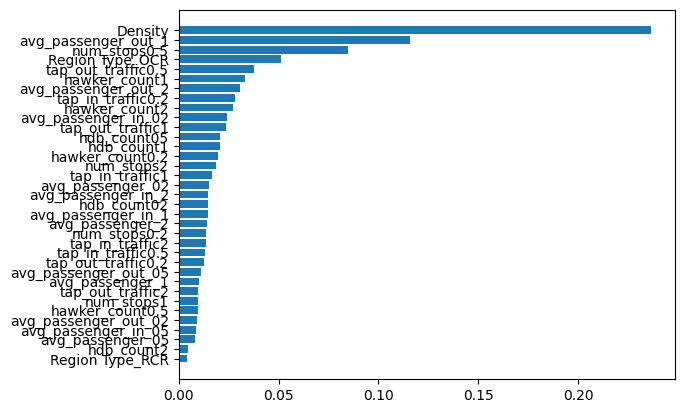

In [70]:
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [74]:
# implement a logistic regression
from sklearn.linear_model import LogisticRegression

# create a dictionary of all values we want to test for logistic regression
param_grid = {'penalty': ['elasticnet','l1', 'l2'], 'C': np.logspace(-4, 4, 20)}
# logistic regression model
lr = LogisticRegression()
# use gridsearch to test all values for logistic regression
lr_gscv = GridSearchCV(lr, param_grid, cv=5)
# fit model to data
lr_gscv.fit(X_train, y_train)
# predict the test data
predictions = lr_gscv.predict(X_test)
# print the best parameters
print(lr_gscv.best_params_)
print(f'{lr_gscv.best_score_}')
print(lr_gscv.best_estimator_)
print(lr_gscv.best_index_)

/Users/nick/Github/GA_Capstone/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nick/Github/GA_Capstone/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

{'C': 1.623776739188721, 'penalty': 'l2'}
0.4894894894894895
LogisticRegression(C=1.623776739188721)
32


/Users/nick/Github/GA_Capstone/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nick/Github/GA_Capstone/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [75]:
# implement KNN
from sklearn.neighbors import KNeighborsClassifier

# create a dictionary of all values we want to test for KNN
param_grid = {'n_neighbors': np.arange(1, 25), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
# KNN model
knn = KNeighborsClassifier()
# use gridsearch to test all values for KNN
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
# fit model to data
knn_gscv.fit(X_train, y_train)
# predict the test data
predictions = knn_gscv.predict(X_test)
# print the best parameters
print(knn_gscv.best_params_)
print(f'{knn_gscv.best_score_}')
print(knn_gscv.best_estimator_)
print(knn_gscv.best_index_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.7447447447447447
KNeighborsClassifier(metric='manhattan', n_neighbors=1)
48


In [76]:
# implement SVM
from sklearn.svm import SVC

# create a dictionary of all values we want to test for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
# SVM model
svm = SVC()
# use gridsearch to test all values for SVM
svm_gscv = GridSearchCV(svm, param_grid, cv=5)
# fit model to data
svm_gscv.fit(X_train, y_train)
# predict the test data
predictions = svm_gscv.predict(X_test)
# print the best parameters
print(svm_gscv.best_params_)
print(f'{svm_gscv.best_score_}')
print(svm_gscv.best_estimator_)
print(svm_gscv.best_index_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.3857357357357357
SVC(C=1, gamma=1)
4


Confusion matrix, without normalization
[[13  2  2]
 [ 0 13  3]
 [ 3  2  9]]
Normalized confusion matrix
[[0.76470588 0.11764706 0.11764706]
 [0.         0.8125     0.1875    ]
 [0.21428571 0.14285714 0.64285714]]


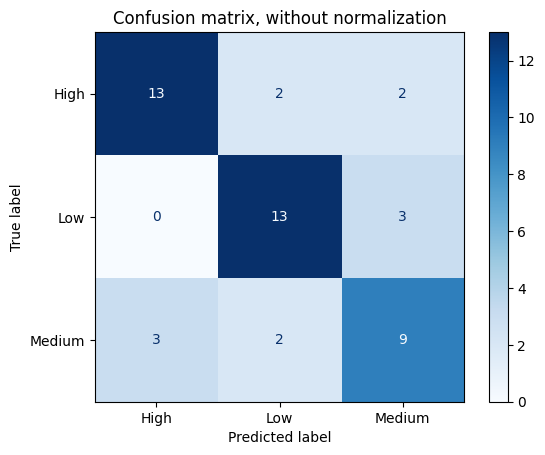

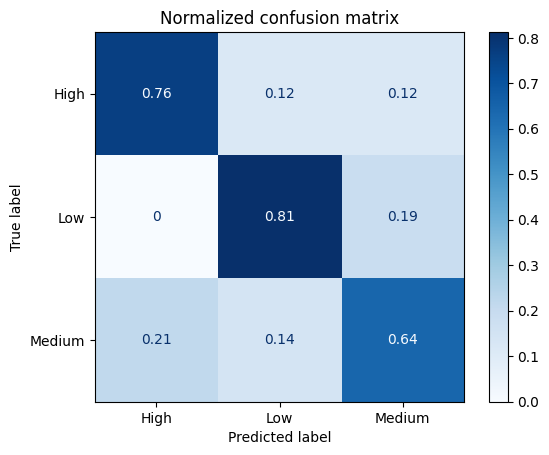

In [77]:

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc_gscv.best_estimator_,
        X_test,
        y_test,
        display_labels=['High','Low','Medium'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[14  1  2]
 [ 0 12  4]
 [ 2  6  6]]
Normalized confusion matrix
[[0.82352941 0.05882353 0.11764706]
 [0.         0.75       0.25      ]
 [0.14285714 0.42857143 0.42857143]]


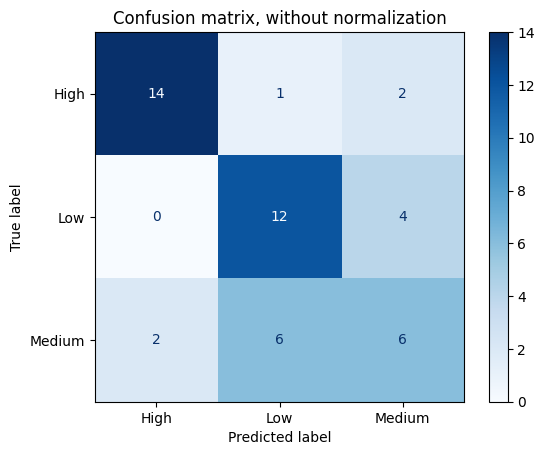

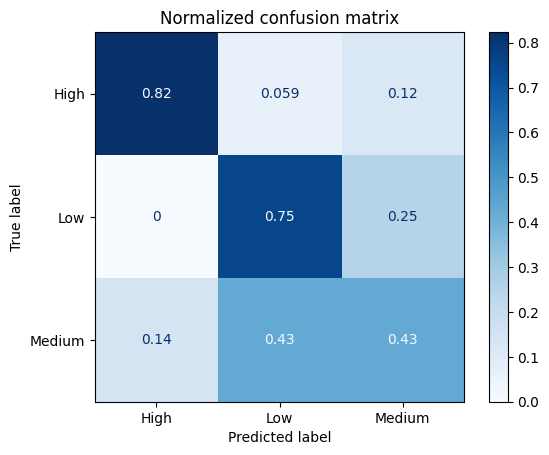

In [78]:

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_gscv.best_estimator_,
        X_test,
        y_test,
        display_labels=['High','Low','Medium'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[10  4  3]
 [ 0 10  6]
 [ 2  5  7]]
Normalized confusion matrix
[[0.58823529 0.23529412 0.17647059]
 [0.         0.625      0.375     ]
 [0.14285714 0.35714286 0.5       ]]


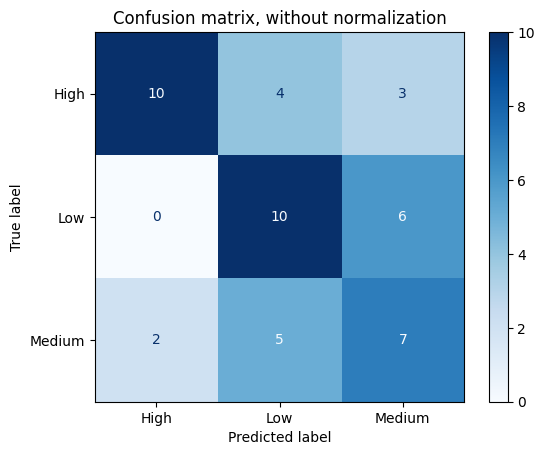

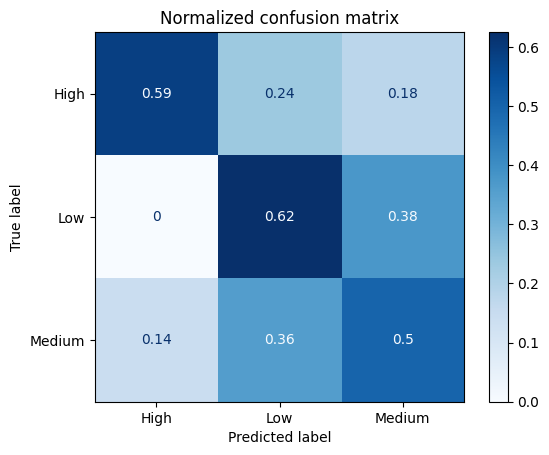

In [79]:

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr_gscv.best_estimator_,
        X_test,
        y_test,
        display_labels=['High','Low','Medium'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[ 0  0 17]
 [ 0  0 16]
 [ 0  0 14]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


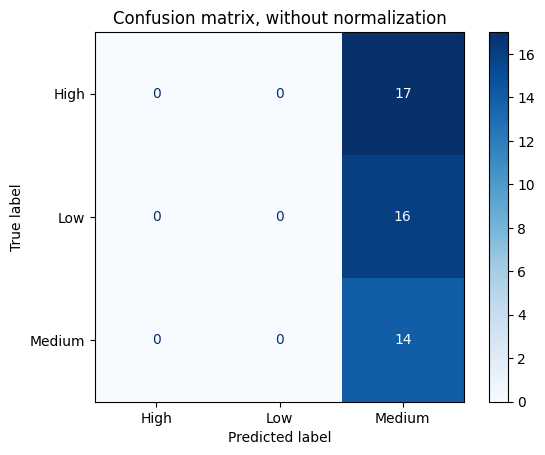

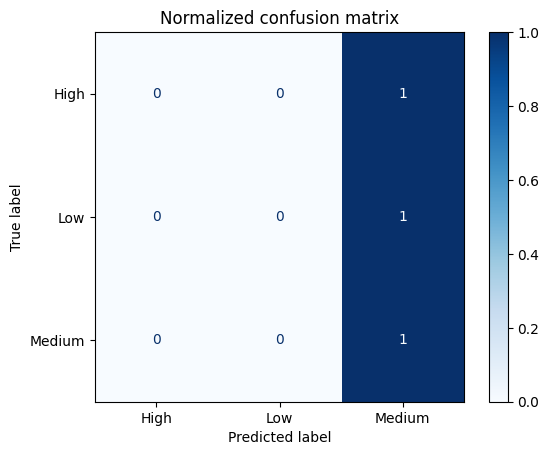

In [80]:

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_gscv.best_estimator_,
        X_test,
        y_test,
        display_labels=['High','Low','Medium'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [136]:
mcd_df_copy

,Classification,Population,Size,Density,tap_in_traffic0.2,tap_in_traffic0.5,tap_in_traffic1,tap_in_traffic2,tap_out_traffic0.2,tap_out_traffic0.5,...,avg_passenger_in_1,avg_passenger_in_2,avg_passenger_out_02,avg_passenger_out_05,avg_passenger_out_1,avg_passenger_out_2,avg_passenger_02,avg_passenger_05,avg_passenger_1,avg_passenger_2
0,Medium,265850.0,20.89,12726.18,474.0,8638.0,21045.0,74550.0,199.0,13261.0,...,300.642857,334.304933,66.333333,631.476190,401.571429,427.802691,224.333333,1042.809524,702.214286,762.107623
1,Medium,265850.0,20.89,12726.18,450.0,3109.0,22048.0,84113.0,308.0,1627.0,...,373.694915,404.389423,102.666667,108.466667,331.101695,438.572115,252.666667,315.733333,704.796610,842.961538
2,Medium,265850.0,20.89,12726.18,8690.0,13606.0,34417.0,82498.0,4468.0,8631.0,...,674.843137,491.059524,1489.333333,479.500000,392.549020,362.297619,4386.000000,1235.388889,1067.392157,853.357143
3,Low,278970.0,21.69,12861.69,271.0,1581.0,16870.0,83773.0,122.0,960.0,...,421.750000,520.329193,61.000000,87.272727,376.650000,465.136646,196.500000,231.000000,798.400000,985.465839
4,High,146410.0,15.02,9747.67,16.0,1730.0,11670.0,75873.0,0.0,14213.0,...,233.400000,454.329341,0.000000,1184.416667,744.900000,615.131737,16.000000,1328.583333,978.300000,1069.461078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,High,258700.0,14.69,17610.62,491.0,5363.0,14459.0,62627.0,197.0,4327.0,...,401.638889,463.903704,98.500000,309.071429,304.888889,416.192593,344.000000,692.142857,706.527778,880.096296
132,High,150630.0,14.34,10504.18,0.0,329.0,1258.0,16627.0,0.0,622.0,...,78.625000,221.693333,0.000000,124.400000,143.437500,607.186667,0.000000,190.200000,222.062500,828.880000
133,High,150630.0,14.34,10504.18,72.0,329.0,1987.0,18364.0,524.0,622.0,...,99.350000,232.455696,262.000000,124.400000,147.250000,550.379747,298.000000,190.200000,246.600000,782.835443
135,Medium,265850.0,20.89,12726.18,0.0,3297.0,40039.0,84337.0,19.0,1997.0,...,615.984615,399.701422,19.000000,117.470588,368.215385,434.672986,19.000000,311.411765,984.200000,834.374408


In [14]:
# create a new df based on the top features
mcd_df_copy2 = mcd_df_copy[['hdb_count05','num_stops0.5','tap_in_traffic0.5','tap_out_traffic0.2','Density','Classification']]

In [16]:
# do a train test split of mcd_df_copy2
X = mcd_df_copy2.drop('Classification', axis=1)
y = mcd_df_copy2['Classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a gradient boost model
from sklearn.ensemble import GradientBoostingClassifier

# create a dictionary of all values we want to test for gradient boost
param_grid = {'n_estimators': [100], 'learning_rate': [0.2, 0.02, 0.01], 'max_depth': [4], 'min_samples_split': [2], 'min_samples_leaf': [2], 'max_features': ['log2']}
# gradient boost model
gbc = GradientBoostingClassifier()

# use gridsearch to test all values for gradient boost
gbc_gscv = GridSearchCV(gbc, param_grid, cv=5)

# fit model to data
gbc_gscv.fit(X_train, y_train)

# predict the test data
predictions = gbc_gscv.predict(X_test)

# print the best parameters
print(gbc_gscv.best_params_)
print(f'{gbc_gscv.best_score_}')
print(gbc_gscv.best_estimator_)
print(gbc_gscv.best_index_)

{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.529047619047619
GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=2)
2


[22 23 23  5 22 26 23 23 13 23 22 23 23 23 23 23 13  9  5 12  4 13 19 23
  9  5 23  4  4 22 18 23 17 23 19 23 23 26  4 19  5 23 26 23  9  4 23 17
 26 23  4 23 22 23 23 23 22 26  4 17 18  4  5  4 17 19  4  4 18  6  9  5
 22 23  4 23 22 23 23  9  4  6 22 23  5 23 23 23 23 25 10  4 10  4 25  6
 12 12  5 10 23 22 26  9 23 18  4 23 23 23 13  5 10  4 23 25  4 22 17 23
 22 12  9 23 23 23  9 23 23 25 18 18  5 12 23  5 23 23 13 19 22 10 10 23
  9 23 23 18  4 26 12 23  5 17 23 23  9 13 23  4  9 23 23  4 18 12 22 10
 23 13  9  5  9 23 23  6 22 23  4 12 22 23 13  9]


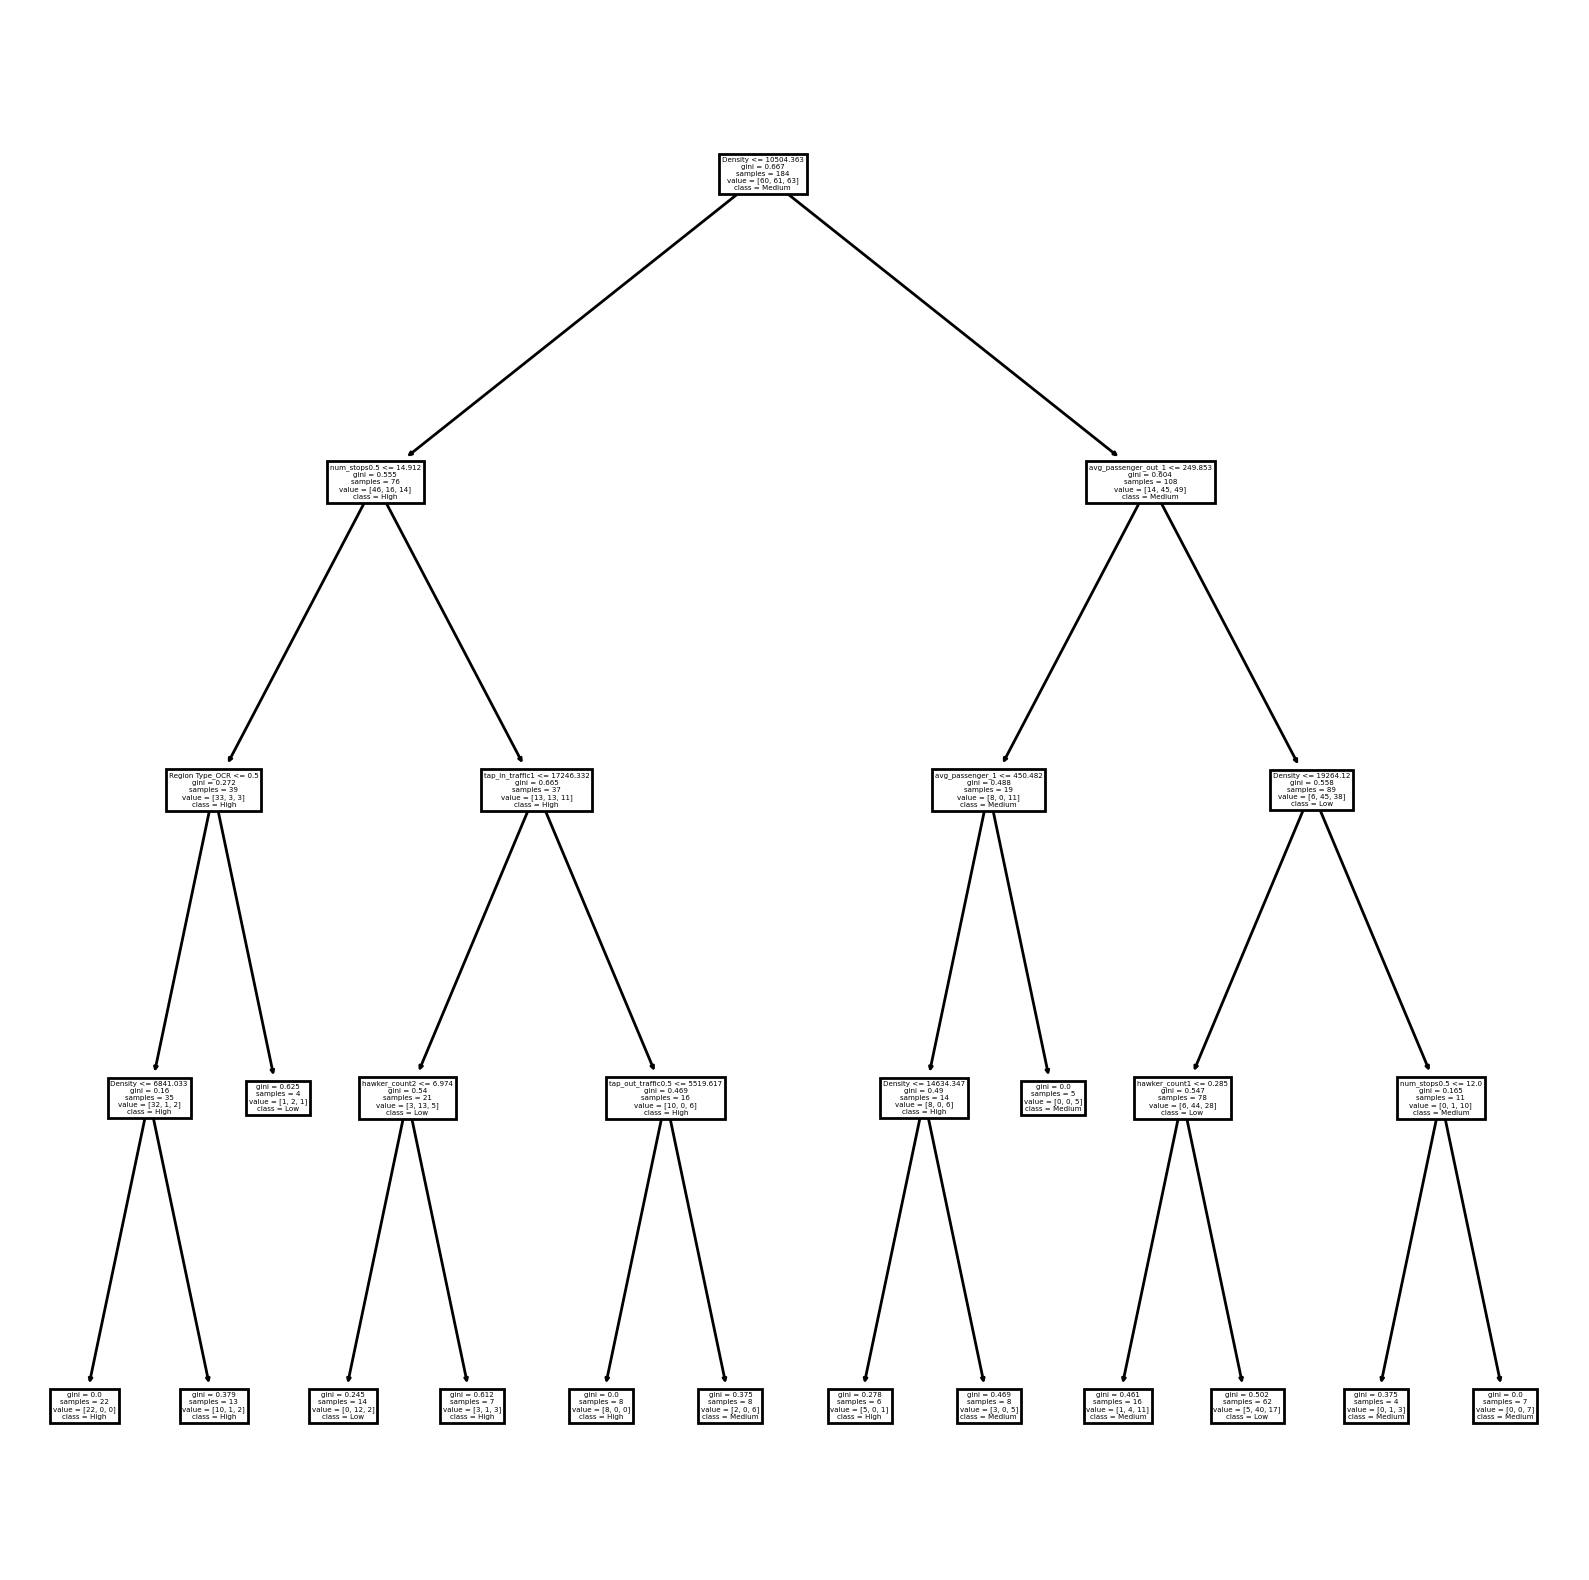

In [84]:
# visualize the decision tree
from sklearn import tree

print(grid.best_estimator_.apply(X_train))

fn=X.col
cn=['High', 'Low', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)
tree.plot_tree(grid.best_estimator_,
               feature_names = fn,
               class_names=cn,
               filled = False);

In [115]:
# export mcd_df_copy to csv
mcd_df_copy.to_csv('mcd_df_copy.csv', index=False)

In [107]:
# implement a dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns


# fill the rows with null values
mcd_df_copy.fillna(0, inplace=True)

# create dummies of 'Classification'
mcd_df_copy = pd.get_dummies(mcd_df_copy, columns=['Classification'])

# use standard scaler to scale the data
scaler = Normalizer()
scaled = scaler.fit_transform(mcd_df_copy)

# create a dbscan model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# fit the model
dbscan.fit(scaled)

# get the labels
labels = dbscan.labels_

# get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# get the number of noise points
n_noise = list(labels).count(-1)

# print the number of clusters and noise points
print(f'There are {n_clusters} clusters and {n_noise} noise points')

# list the noise points
noise_points = mcd_df_copy.iloc[np.where(labels == -1)]

# list the clusters
clusters = mcd_df_copy.iloc[np.where(labels != -1)]

print(noise_points)


There are 1 clusters and 7 noise points
     tap_in_traffic0.2  tap_out_traffic0.2  num_stops0.2  hdb_count02  \
23                 1.0                 3.0             1            0   
37                 0.0                 0.0             0           16   
55                 0.0                 0.0             0            7   
73                 0.0                 0.0             0            6   
90                 1.0                 4.0             2           24   
107               12.0                 5.0             1           16   
132                0.0                 0.0             0            0   

     hawker_count0.2  Classification_High  Classification_Low  \
23                 0                    1                   0   
37                 0                    0                   0   
55                 0                    1                   0   
73                 0                    1                   0   
90                 0                    0         

In [87]:
mcd_df.iloc[110,:]

Title                                                McDonald's Hillion
Address               17 Petir Rd, #B1-25/26/27 Hillion Mall, Singap...
Latitude                                                       1.378482
Longitude                                                    103.763212
Classification                                                   Medium
Planning Area                                             Bukit Panjang
Region                                                             West
Region Type                                                         OCR
Property Type                                                    Retail
AltClass                                                         higher
tap_in_traffic0.2                                                5545.0
tap_out_traffic0.2                                               8477.0
num_stops0.2                                                         10
hdb_count02                                                     

In [22]:
df = EDA_Data(mcd_df)

In [23]:
# export df.total to csv
df.total.to_csv('total.csv', index=False)

In [8]:
# create avg passenger in, avg passenger out, avg num stops
df.total['avg_passenger_in_02'] = df.total['tap_in_traffic0.2'] / df.total['num_stops0.2']
df.total['avg_passenger_in_05'] = df.total['tap_in_traffic0.5'] / df.total['num_stops0.5']
df.total['avg_passenger_in_1'] = df.total['tap_in_traffic1'] / df.total['num_stops1']
df.total['avg_passenger_in_2'] = df.total['tap_in_traffic2'] / df.total['num_stops2']
df.total['avg_passenger_out_02'] = df.total['tap_out_traffic0.2'] / df.total['num_stops0.2']
df.total['avg_passenger_out_05'] = df.total['tap_out_traffic0.5'] / df.total['num_stops0.5']
df.total['avg_passenger_out_1'] = df.total['tap_out_traffic1'] / df.total['num_stops1']
df.total['avg_passenger_out_2'] = df.total['tap_out_traffic2'] / df.total['num_stops2']
df.total['avg_passenger_02'] = (df.total['tap_in_traffic0.2'] + df.total['tap_out_traffic0.2']) / df.total['num_stops0.2']
df.total['avg_passenger_05'] = (df.total['tap_in_traffic0.5'] + df.total['tap_out_traffic0.5']) / df.total['num_stops0.5']
df.total['avg_passenger_1'] = (df.total['tap_in_traffic1'] + df.total['tap_out_traffic1']) / df.total['num_stops1']
df.total['avg_passenger_2'] = (df.total['tap_in_traffic2'] + df.total['tap_out_traffic2']) / df.total['num_stops2']


In [24]:
df.num = df.total.select_dtypes(include=['float64','int64'])

In [25]:
# fill na with 0
df.num.fillna(0, inplace=True)

In [26]:
df.num = pd.concat([df.num,df.total.AltClass],axis=1)

In [ ]:
# # feature scale df.num into df.num_scaled
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Normalizer

# scaler = StandardScaler()
# mmscaler = MinMaxScaler()
# nscaler = Normalizer()

# df_num_scaled = scaler.fit_transform(df.num)

# # convert df.num_scaled to dataframe
# df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num_scaled)

In [ ]:
# # group by classification to see results for differeing distances
# pd.options.display.float_format = '{:.2f}'.format
# df.total.groupby('Classification').median().transpose()

     hawker_count0.5  hawker_count1  hawker_count2  avg_passenger_in_02  \
0                  0              0              2           158.000000   
1                  0              2              2           150.000000   
2                  0              1              4          2896.666667   
3                  1              1              4           135.500000   
4                  1              1              1            16.000000   
..               ...            ...            ...                  ...   
132                0              1              5             0.000000   
133                0              1              5            36.000000   
134                2              5             16           191.200000   
135                1              2              2             0.000000   
136                1              1              1           534.800000   

    AltClass  
0     higher  
1     higher  
2     higher  
3      lower  
4     higher  
..       

array([[<Axes: title={'center': 'avg_passenger_in_02'}, xlabel='[AltClass]'>,
        <Axes: title={'center': 'hawker_count0.5'}, xlabel='[AltClass]'>],
       [<Axes: title={'center': 'hawker_count1'}, xlabel='[AltClass]'>,
        <Axes: title={'center': 'hawker_count2'}, xlabel='[AltClass]'>]],
      dtype=object)

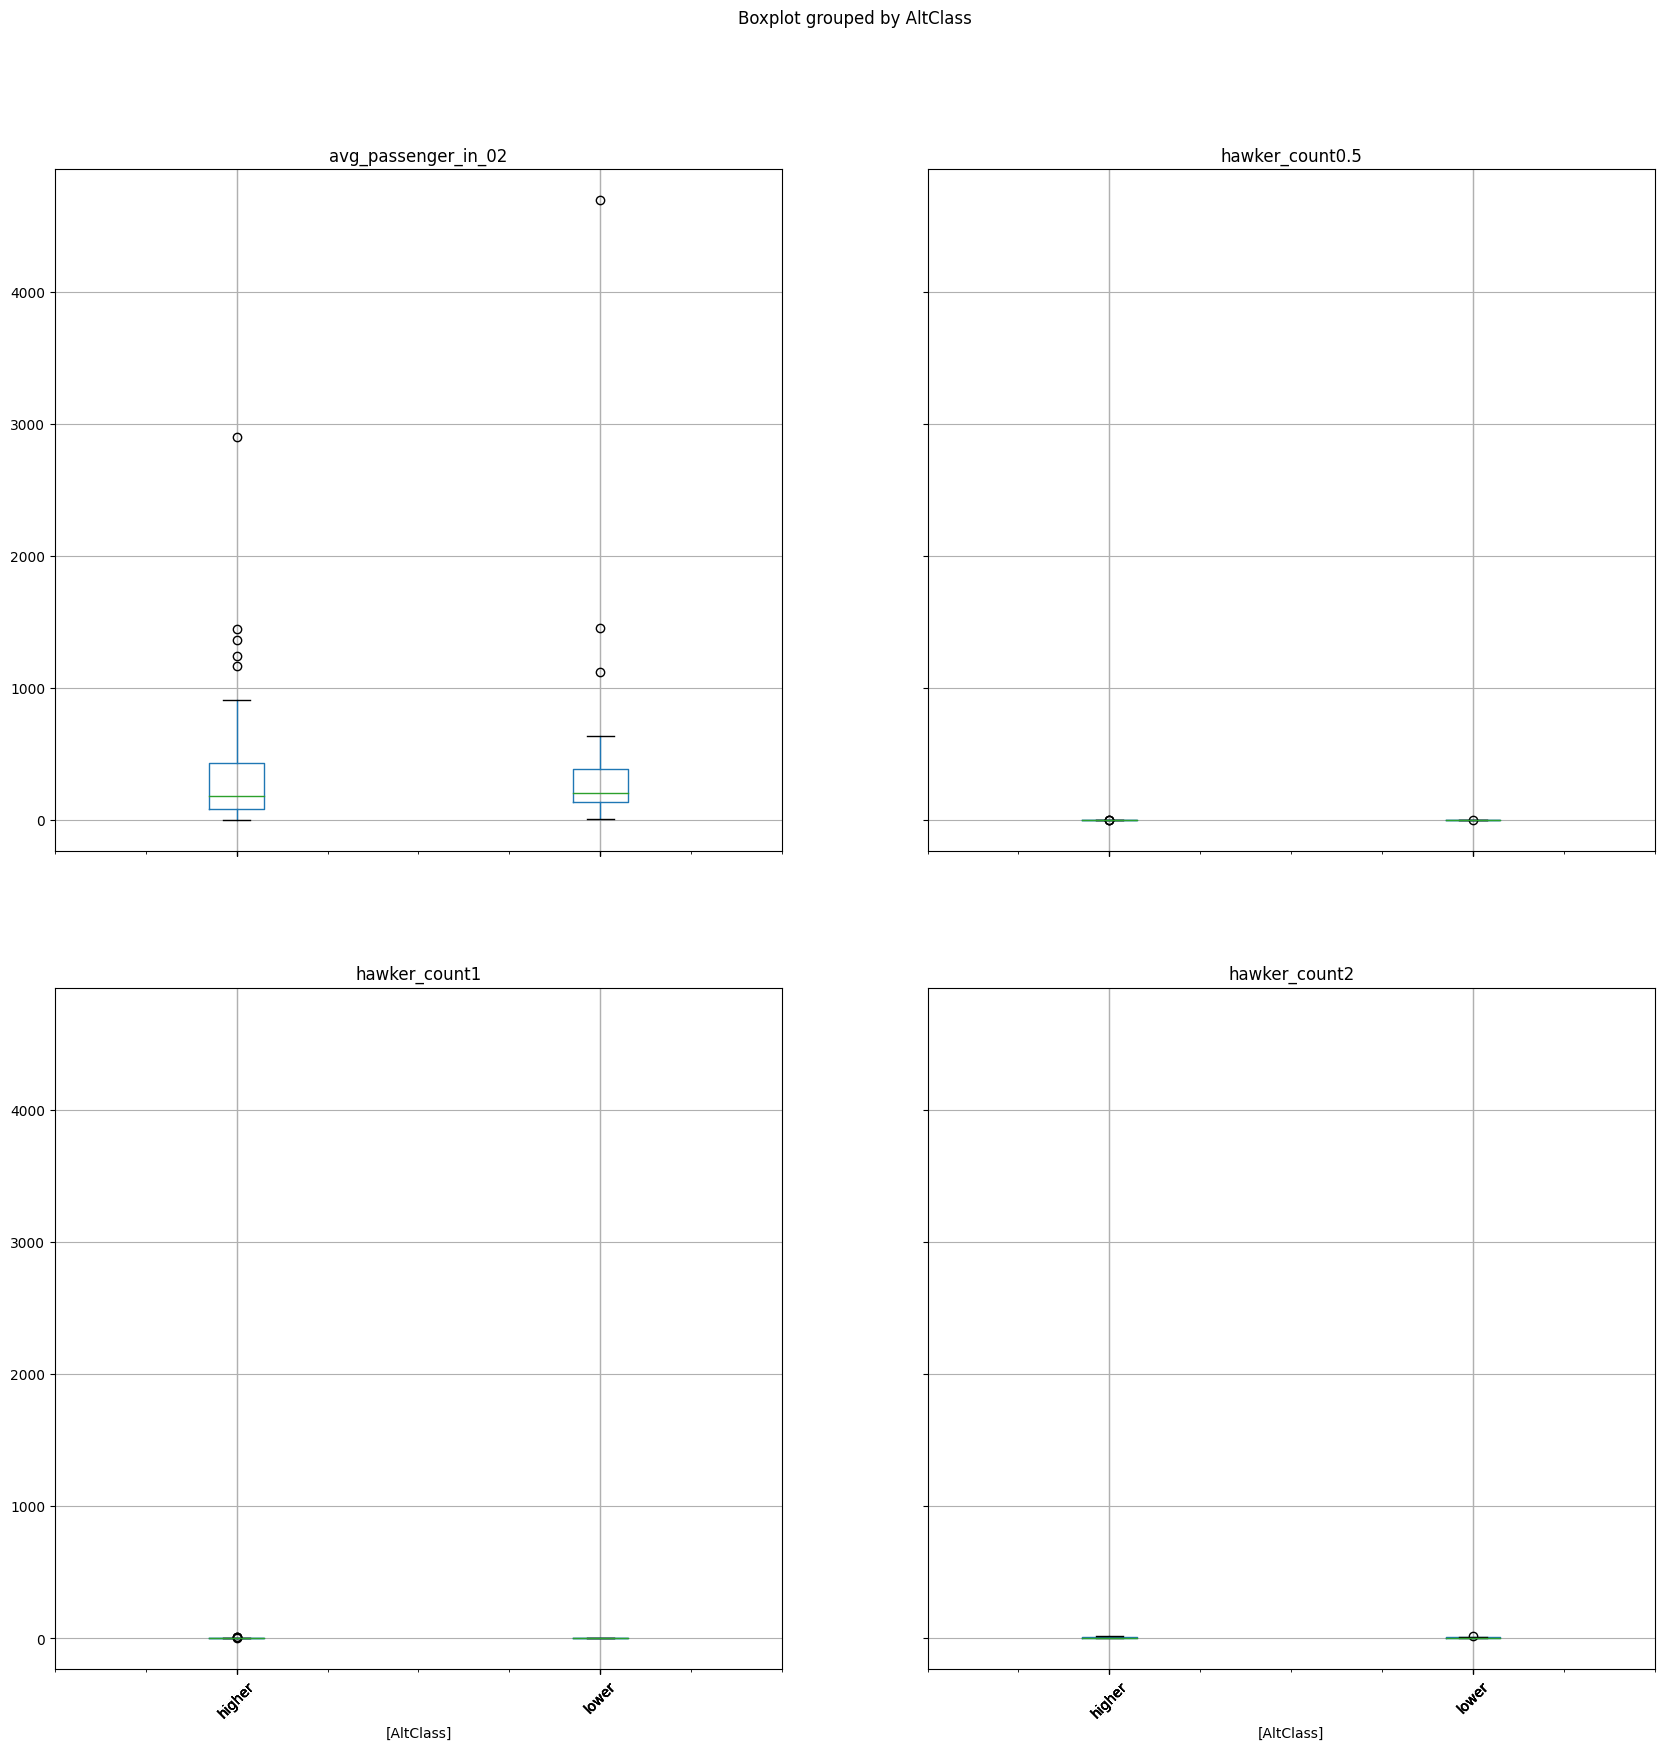

In [37]:
# graph = pd.concat([df.num.iloc[:,-17:-13],df.num.iloc[:,-1:]],axis=1)
# print(graph)
# graph.boxplot(by='AltClass', rot=45, figsize=(20,20))
# # set max y limit to 10000  x
# # plt.ylim(0,10)

array([[<Axes: xlabel='Latitude', ylabel='Latitude'>,
        <Axes: xlabel='Longitude', ylabel='Latitude'>,
        <Axes: xlabel='tap_in_traffic0.2', ylabel='Latitude'>,
        <Axes: xlabel='tap_in_traffic0.5', ylabel='Latitude'>,
        <Axes: xlabel='tap_in_traffic1', ylabel='Latitude'>,
        <Axes: xlabel='tap_in_traffic2', ylabel='Latitude'>,
        <Axes: xlabel='tap_out_traffic0.2', ylabel='Latitude'>,
        <Axes: xlabel='tap_out_traffic0.5', ylabel='Latitude'>,
        <Axes: xlabel='tap_out_traffic1', ylabel='Latitude'>,
        <Axes: xlabel='tap_out_traffic2', ylabel='Latitude'>,
        <Axes: xlabel='num_stops0.2', ylabel='Latitude'>,
        <Axes: xlabel='num_stops0.5', ylabel='Latitude'>,
        <Axes: xlabel='num_stops1', ylabel='Latitude'>,
        <Axes: xlabel='num_stops2', ylabel='Latitude'>],
       [<Axes: xlabel='Latitude', ylabel='Longitude'>,
        <Axes: xlabel='Longitude', ylabel='Longitude'>,
        <Axes: xlabel='tap_in_traffic0.2', ylabel='

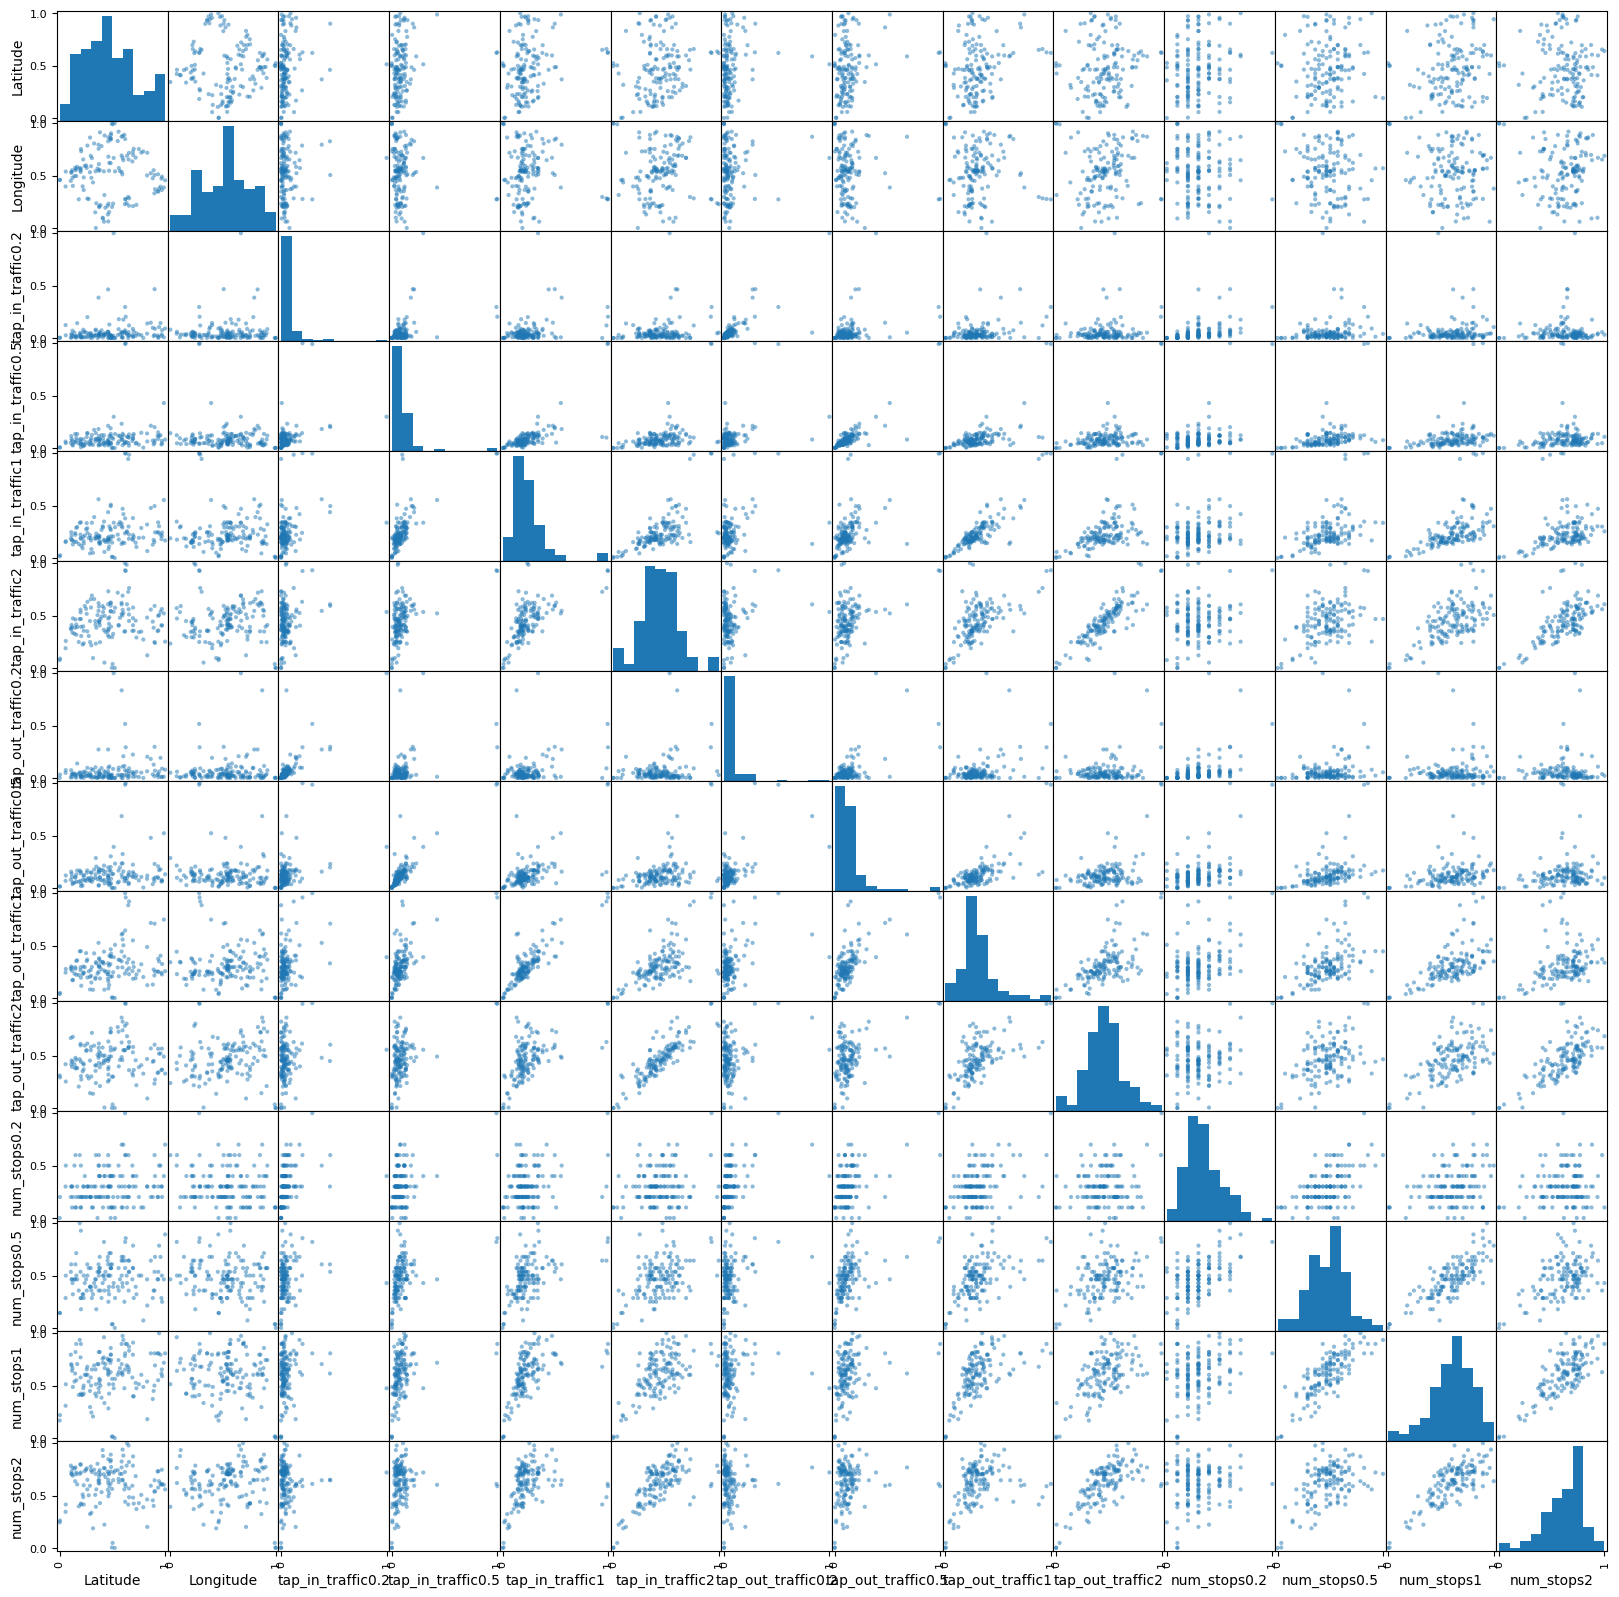

In [ ]:
# # create a scatter matrix
# pd.plotting.scatter_matrix(df_num, figsize=(20,20))

# Modelling

## Prepare data for modelling

In [32]:
X

,Latitude,Longitude,tap_in_traffic0.2,tap_in_traffic0.5,tap_in_traffic1,tap_in_traffic2,tap_out_traffic0.2,tap_out_traffic0.5,tap_out_traffic1,tap_out_traffic2,...,avg_passenger_in_1,avg_passenger_in_2,avg_passenger_out_02,avg_passenger_out_05,avg_passenger_out_1,avg_passenger_out_2,avg_passenger_02,avg_passenger_05,avg_passenger_1,avg_passenger_2
0,1.353387,103.954599,474.0,8638.0,21045.0,74550.0,199.0,13261.0,28110.0,95400.0,...,300.642857,334.304933,66.333333,631.476190,401.571429,427.802691,224.333333,1042.809524,702.214286,762.107623
1,1.352739,103.944979,450.0,3109.0,22048.0,84113.0,308.0,1627.0,19535.0,91223.0,...,373.694915,404.389423,102.666667,108.466667,331.101695,438.572115,252.666667,315.733333,704.796610,842.961538
2,1.348807,103.935786,8690.0,13606.0,34417.0,82498.0,4468.0,8631.0,20020.0,60866.0,...,674.843137,491.059524,1489.333333,479.500000,392.549020,362.297619,4386.000000,1235.388889,1067.392157,853.357143
3,1.332194,103.913711,271.0,1581.0,16870.0,83773.0,122.0,960.0,15066.0,74887.0,...,421.750000,520.329193,61.000000,87.272727,376.650000,465.136646,196.500000,231.000000,798.400000,985.465839
4,1.374088,103.951925,16.0,1730.0,11670.0,75873.0,0.0,14213.0,37245.0,102727.0,...,233.400000,454.329341,0.000000,1184.416667,744.900000,615.131737,16.000000,1328.583333,978.300000,1069.461078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1.264217,103.820358,0.0,329.0,1258.0,16627.0,0.0,622.0,2295.0,45539.0,...,78.625000,221.693333,0.000000,124.400000,143.437500,607.186667,0.000000,190.200000,222.062500,828.880000
133,1.264799,103.821481,72.0,329.0,1987.0,18364.0,524.0,622.0,2945.0,43480.0,...,99.350000,232.455696,262.000000,124.400000,147.250000,550.379747,298.000000,190.200000,246.600000,782.835443
134,1.290026,103.832506,956.0,3541.0,12212.0,47722.0,709.0,2194.0,14055.0,57324.0,...,271.377778,247.264249,141.800000,156.714286,312.333333,297.015544,333.000000,409.642857,583.711111,544.279793
135,1.353609,103.944148,0.0,3297.0,40039.0,84337.0,19.0,1997.0,23934.0,91716.0,...,615.984615,399.701422,19.000000,117.470588,368.215385,434.672986,19.000000,311.411765,984.200000,834.374408


In [35]:
X.columns[15]

'hdb_count2'

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
# drop Alt Class column for x
# drop Latitude and Longitude columns for X

X = df.num.drop('AltClass', axis=1)
X = X.drop(['Latitude','Longitude'], axis=1)
y = df.total.AltClass

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest to the data
rf.fit(X, y)

# Get the feature importance scores
importances = rf.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. Feature {indices[f]}: {importances[indices[f]]}")


Feature ranking:
1. Feature 15: 0.05486403902499025
2. Feature 10: 0.047383986557882264
3. Feature 14: 0.04734737807217237
4. Feature 26: 0.0428638707826758
5. Feature 13: 0.04163135784554299
6. Feature 12: 0.040626241588911455
7. Feature 6: 0.038205306894651694
8. Feature 22: 0.035932132325181616
9. Feature 27: 0.03530196074664014
10. Feature 7: 0.03469762959863976
11. Feature 25: 0.034633769815684584
12. Feature 29: 0.034604339747988724
13. Feature 0: 0.03373231180017304
14. Feature 30: 0.03340547633829145
15. Feature 11: 0.03228582207013644
16. Feature 21: 0.03208637086728916
17. Feature 20: 0.03168245424891805
18. Feature 31: 0.030963564987505278
19. Feature 23: 0.0293103153617932
20. Feature 4: 0.029267629804393024
21. Feature 28: 0.029252071792383174
22. Feature 3: 0.02888217944162054
23. Feature 5: 0.02810726298955438
24. Feature 1: 0.027451903459045784
25. Feature 9: 0.02667823946320374
26. Feature 2: 0.026470946574341108
27. Feature 24: 0.02502538860906443
28. Feature 8: 0.018

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

the training score is: 0.98
the accuracy of the model is: 0.68


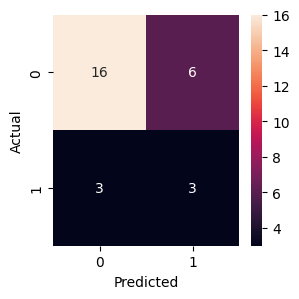

the training score is: 0.94
the accuracy of the model is: 0.79


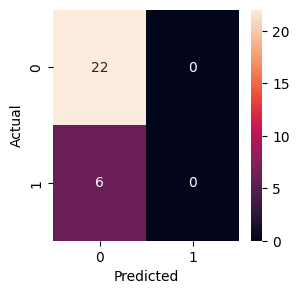

the training score is: 0.95
the accuracy of the model is: 0.79


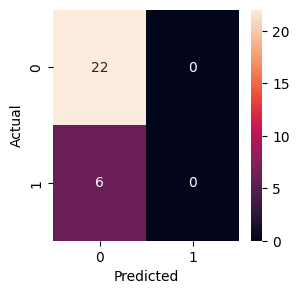

the training score is: 1.00
the accuracy of the model is: 0.71


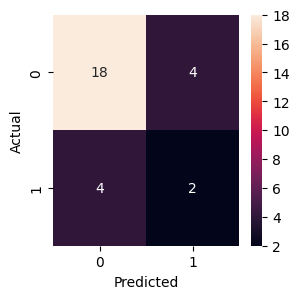

the training score is: 1.00
the accuracy of the model is: 0.82


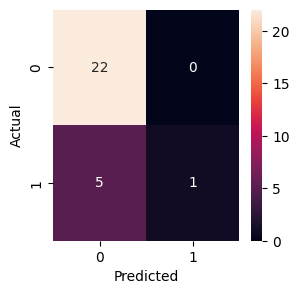

In [30]:
# distance = [0.5,1.5,2.5]

# for i in distance:
#     passenger_out = Passenger_Data().traffic_volume(i, matrix_df, mcd_df, stop_df, traffic_df, 'TOTAL_TAP_OUT_VOLUME')
#     passenger_in = Passenger_Data().traffic_volume(i, matrix_df, mcd_df, stop_df, traffic_df, 'TOTAL_TAP_IN_VOLUME')
#     num_stops = Passenger_Data().num_bus_stops(i, matrix_df, mcd_df, stop_df, traffic_df, 'NUM_STOPS')

#     passenger_out.to_csv(f'passenger_out{i}.csv', index=False)
#     passenger_in.to_csv(f'passenger_in{i}.csv', index=False)
#     num_stops.to_csv(f'num_stops{i}.csv', index=False)

    # model_df = pd.merge(mcd_df, passenger_out, left_on='Title', right_on='index', how='inner')
    # model_df = pd.merge(model_df, passenger_in, left_on='Title', right_on='index', how='inner')
    # model_df = pd.merge(model_df, num_stops, left_on='Title', right_on='index', how='inner')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
num_vars = df.num.select_dtypes(include=['float64','int64']).columns
# drop latitude and longitude columns
num_vars = num_vars.drop(['Latitude','Longitude'])

# # Encode the categorical variables
# encoder = OneHotEncoder()
# encoded_cat = encoder.fit_transform(df[cat_vars])

# Scale the numerical variables
scaler = StandardScaler()
scaled_num = scaler.fit_transform(df.total[num_vars])

X = pd.concat([
    # pd.DataFrame(encoded_cat.toarray()), 
    pd.DataFrame(scaled_num)], axis=1)
# fill X NaN with 0
X.fillna(0, inplace=True)
y = df.total['AltClass']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=6)

# fit the model
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

# print out training score
print(f'the training score is: {dt.score(X_train, y_train):.2f}')

# check the accuracy of the model
print(f'the accuracy of the model is: {accuracy_score(y_test, y_pred):.2f}')
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# use a bagging classifier instead
from sklearn.ensemble import BaggingClassifier

# create a bagging classifier
bag = BaggingClassifier(n_estimators=50, max_samples=0.5, max_features=0.5)

# fit the model
bag.fit(X_train, y_train)

# predict the test data
y_pred = bag.predict(X_test)

# print out training score
print(f'the training score is: {bag.score(X_train, y_train):.2f}')

# check the accuracy of the model
print(f'the accuracy of the model is: {accuracy_score(y_test, y_pred):.2f}')
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# use a random forest classifier instead
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5)

# fit the model
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

# print out training score
print(f'the training score is: {rf.score(X_train, y_train):.2f}')

# check the accuracy of the model
print(f'the accuracy of the model is: {accuracy_score(y_test, y_pred):.2f}')
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# use a adaboost classifier instead
from sklearn.ensemble import AdaBoostClassifier

# create a adaboost classifier
ada = AdaBoostClassifier(n_estimators=50)

# fit the model
ada.fit(X_train, y_train)

# predict the test data
y_pred = ada.predict(X_test)

# print out training score
print(f'the training score is: {ada.score(X_train, y_train):.2f}')

# check the accuracy of the model
print(f'the accuracy of the model is: {accuracy_score(y_test, y_pred):.2f}')
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# use a gradient boosting classifier instead
from sklearn.ensemble import GradientBoostingClassifier

# create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=50)

# fit the model
gb.fit(X_train, y_train)

# predict the test data
y_pred = gb.predict(X_test)

# print out training score
print(f'the training score is: {gb.score(X_train, y_train):.2f}')

# check the accuracy of the model
print(f'the accuracy of the model is: {accuracy_score(y_test, y_pred):.2f}')
fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [121]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

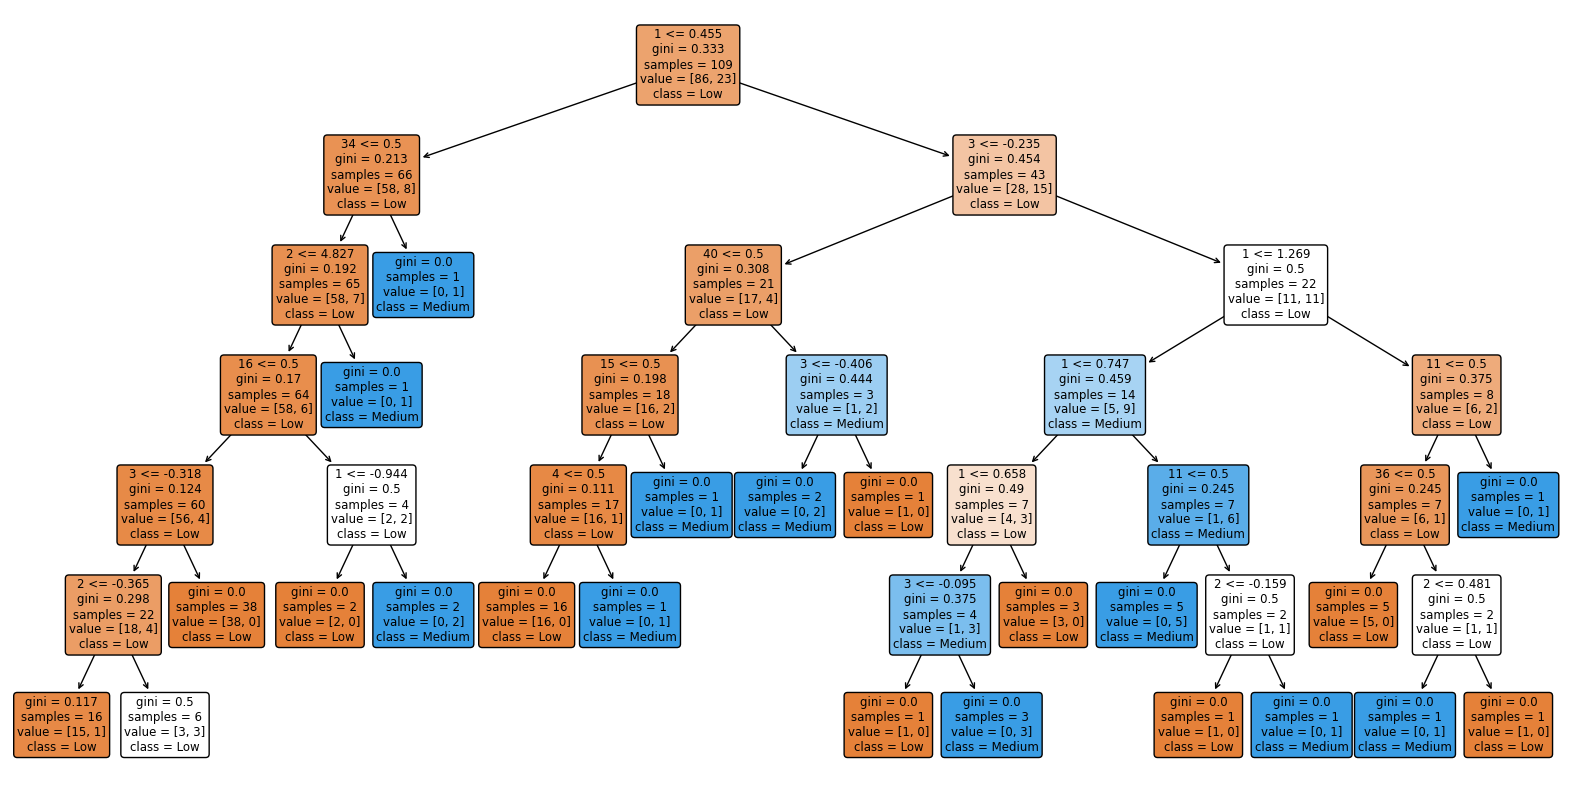

In [134]:
# plot decision tree with max_depth=5
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, class_names=['Low', 'Medium', 'High'], feature_names=X.columns)
plt.show()


In [319]:
# Create a dataframe to sum the passenger volume data
passenger_out = Passenger_Data(matrix_df).traffic_volume(0.5, mcd_df, stop_df, traffic_df, 'TOTAL_TAP_OUT_VOLUME')

# We should get 137 McDonalds and 1 column for passenger volume within {distance} km from the bus stop
print(passenger_out.shape)

(137, 1)


In [320]:
# Create a dataframe to sum the passenger volume data
passenger_in = Passenger_Data(matrix_df).traffic_volume(0.5, mcd_df, stop_df, traffic_df, 'TOTAL_TAP_IN_VOLUME')

# We should get 137 McDonalds and 1 column for passenger volume within {distance} km from the bus stop
print(passenger_in.shape)

(137, 1)


In [321]:
# merge passenger volume with mcd_df
model_df = pd.merge(mcd_df, passenger_out, left_on='Title', right_on='index', how='inner')
model_df = pd.merge(model_df, passenger_in, left_on='Title', right_on='index', how='inner')

print(model_df.shape)

(137, 7)
